In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import statsmodels.tsa.seasonal as seasonal
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import seaborn as sns


In [193]:
data  = pd.read_csv('임시.csv',encoding='utf-8-sig')
data.isnull().sum()

일시             0
품종             0
위판중량(kg)       0
평균 풍속(m/s)     0
평균기압(hPa)      0
평균 상대습도(%)     0
평균 기온(°C)      0
평균 수온(°C)      0
평균 최대 파고(m)    0
평균 유의 파고(m)    0
평균 파주기(sec)    0
WTI            0
dtype: int64

In [194]:

data['일시'].is_unique


False

In [195]:
data = data.drop_duplicates(subset=['일시'])
data['일시'] = pd.to_datetime(data['일시'])
data = data.set_index('일시').asfreq('d')
data = data.drop(['품종'],axis=1)

In [196]:
data.dtypes

위판중량(kg)       float64
평균 풍속(m/s)     float64
평균기압(hPa)      float64
평균 상대습도(%)     float64
평균 기온(°C)      float64
평균 수온(°C)      float64
평균 최대 파고(m)    float64
평균 유의 파고(m)    float64
평균 파주기(sec)    float64
WTI            float64
dtype: object

In [197]:
weekly_mean_data = data.resample(rule='W').mean()
weekly_mean_data.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05'],
              dtype='datetime64[ns]', name='일시', length=531, freq='W-SUN')

In [198]:
monthly_mean_data = data.resample(rule='M').mean()

In [199]:
standard = StandardScaler()
minmax = MinMaxScaler()

weekly_mean_data_stan = pd.DataFrame(standard.fit_transform(weekly_mean_data),columns=data.columns, index=weekly_mean_data.index)
weekly_mean_data_mm = pd.DataFrame(minmax.fit_transform(weekly_mean_data),columns=data.columns, index=weekly_mean_data.index)

In [200]:
data1 = data.reset_index()
catches = data1[['일시','위판중량(kg)']]
catches['일시'] = pd.to_datetime(catches['일시'])

print(catches)

             일시  위판중량(kg)
0    2013-01-01    5766.0
1    2013-01-02  253212.0
2    2013-01-03  119183.0
3    2013-01-04  128879.0
4    2013-01-05    3912.0
...         ...       ...
3706 2023-02-24    9807.0
3707 2023-02-25   19145.0
3708 2023-02-26    4646.0
3709 2023-02-27  112521.0
3710 2023-02-28   67844.0

[3711 rows x 2 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_15648\16652899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catches['일시'] = pd.to_datetime(catches['일시'])


In [201]:
catches['일시'].is_unique

True

In [202]:
catches = catches.drop_duplicates(subset=['일시'])
catches = catches.set_index('일시').asfreq('d')

In [203]:
new_df = catches.resample(rule='W').mean()

In [204]:
month_df = catches.resample(rule='M').mean()

Text(0, 0.5, '위탁량')

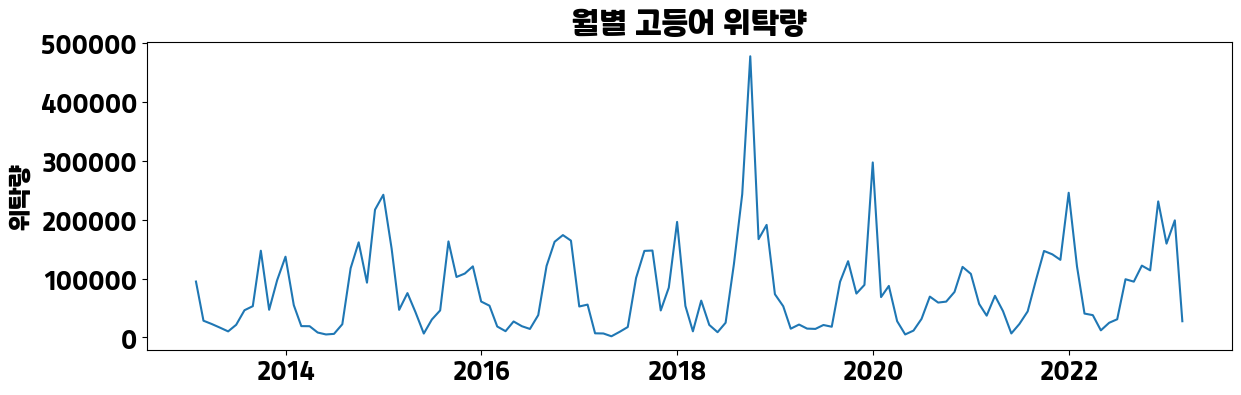

In [205]:
mpl.rcParams['font.family'] = 'Recipekorea'
plt.figure(figsize=(14,4))
plt.plot(month_df)
plt.title( '월별 고등어 위탁량' , fontsize= 20 )
plt.ylabel( '위탁량' , fontsize= 16 )

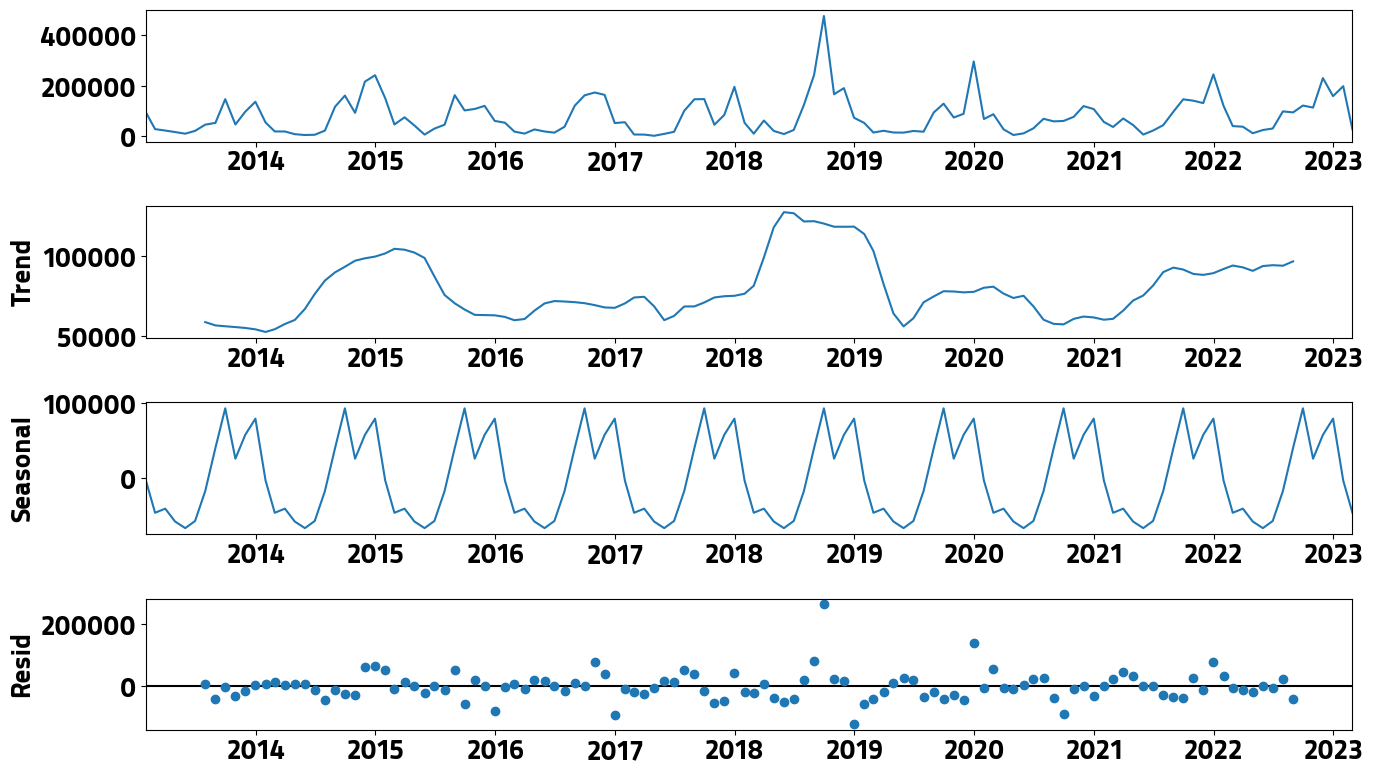

In [206]:
plt.rc( 'figure' ,figsize=( 14 , 8 )) 
plt.rc( 'font' ,size= 15 ) 

result =seasonal.seasonal_decompose(month_df,model= 'additive') 
fig = result.plot()

Text(0, 0.5, '위탁량')

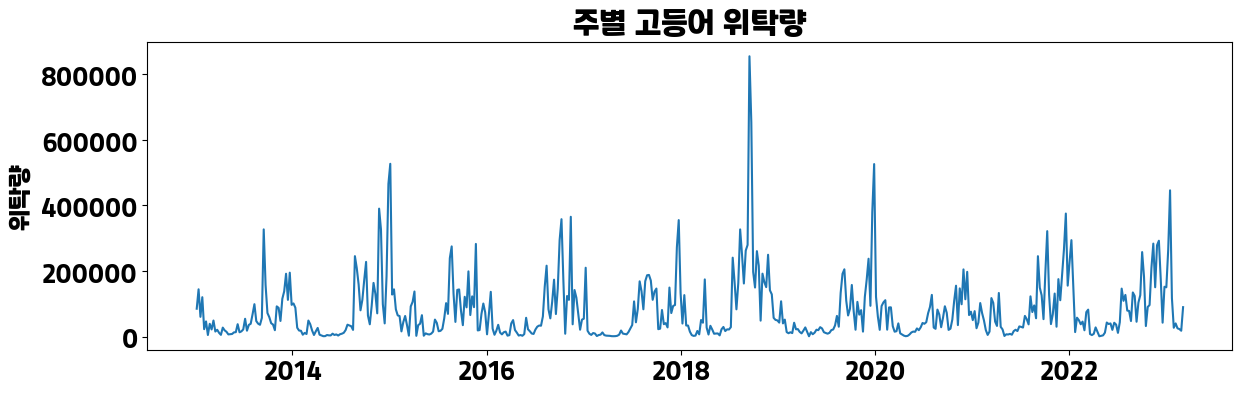

In [207]:
mpl.rcParams['font.family'] = 'Recipekorea'
plt.figure(figsize=(14,4))
plt.plot(new_df)
plt.title( '주별 고등어 위탁량' , fontsize= 20 )
plt.ylabel( '위탁량' , fontsize= 16 )

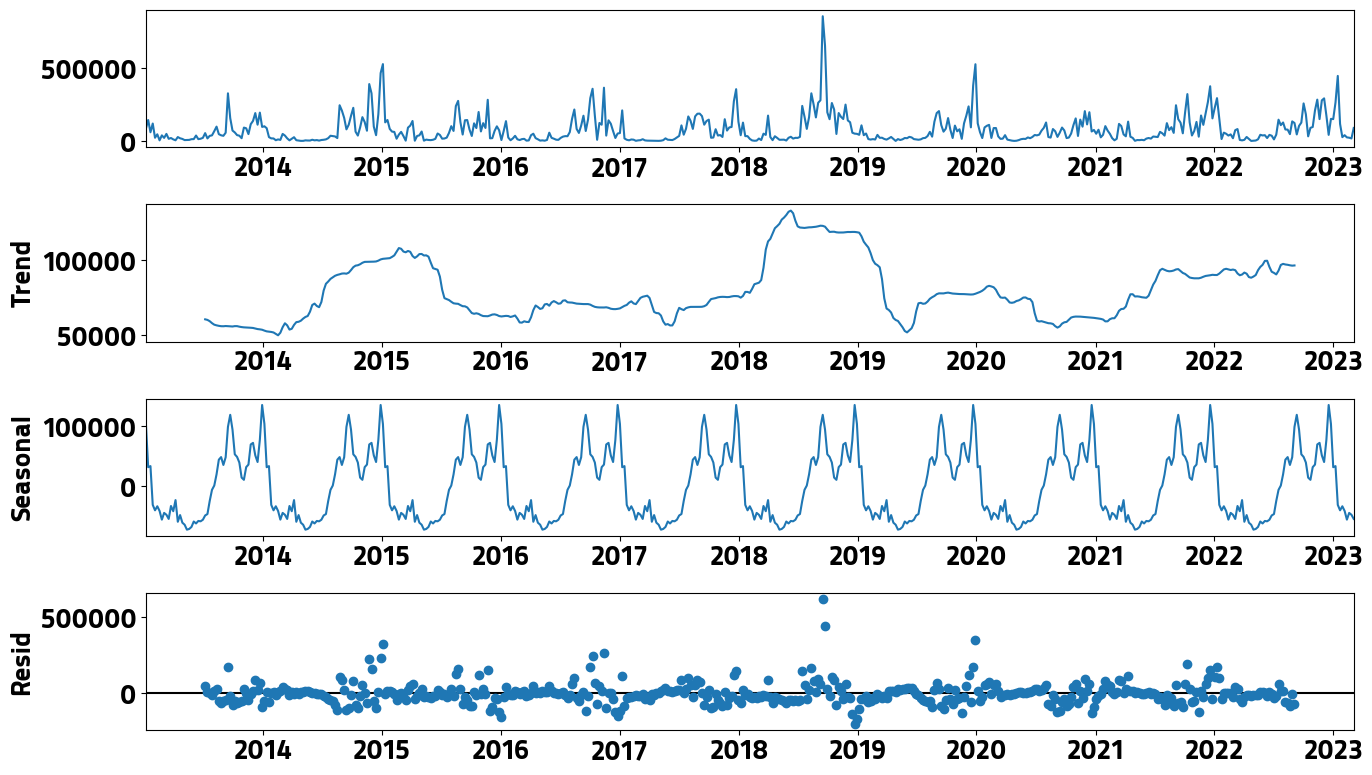

In [208]:
plt.rc( 'figure' ,figsize=( 14 , 8 )) 
plt.rc( 'font' ,size= 15 ) 

result =seasonal.seasonal_decompose(new_df,model= 'additive') 
fig = result.plot()

Text(0, 0.5, '위탁량')

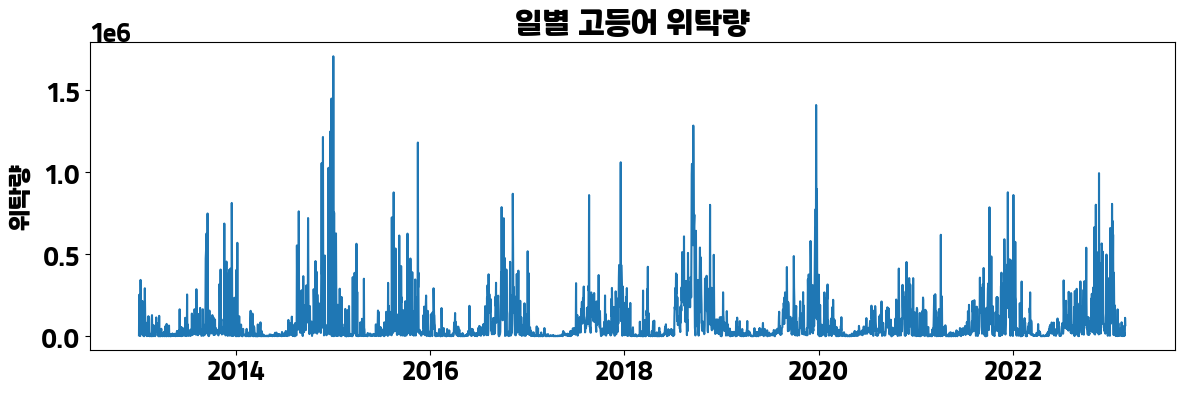

In [209]:
mpl.rcParams['font.family'] = 'Recipekorea'
plt.figure(figsize=(14,4))
plt.plot(catches)
plt.title( '일별 고등어 위탁량' , fontsize= 20 )
plt.ylabel( '위탁량' , fontsize= 16 )

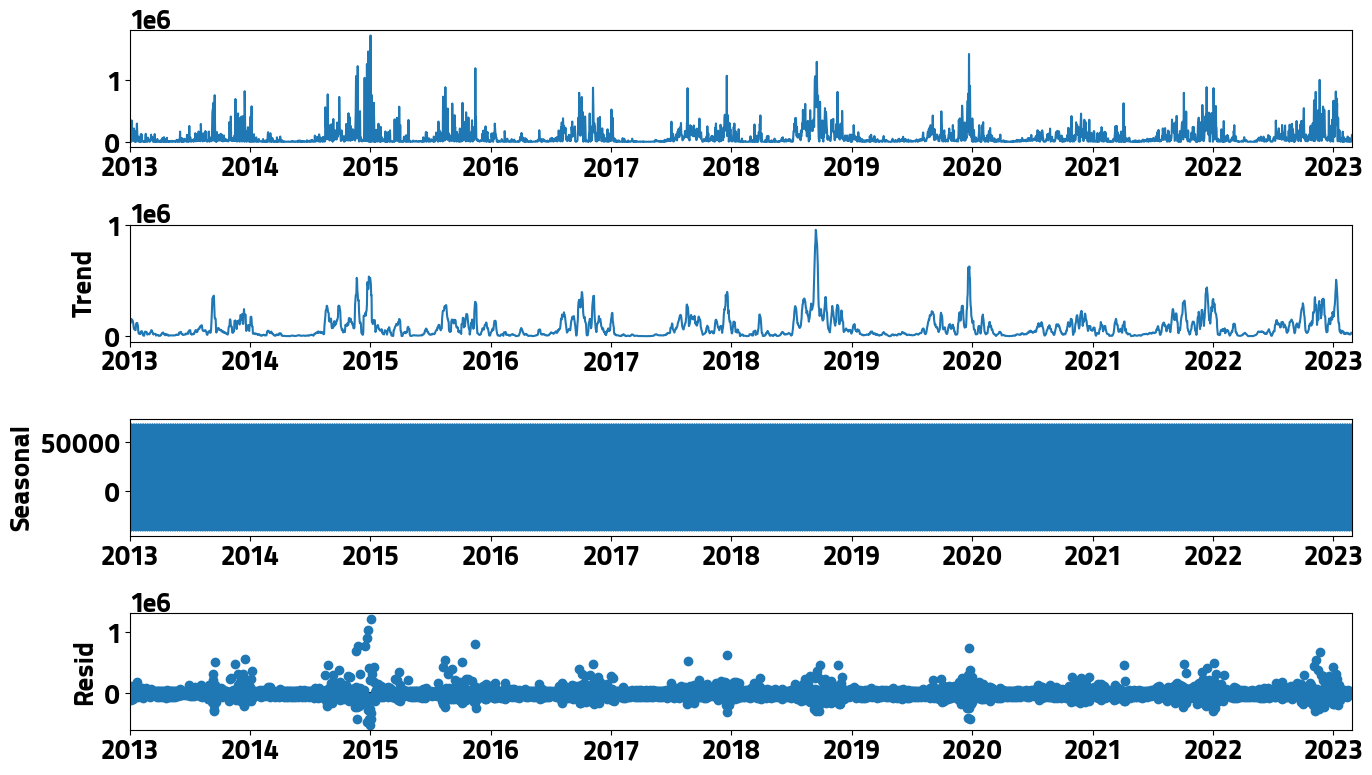

In [210]:
plt.rc( 'figure' ,figsize=( 14 , 8 )) 
plt.rc( 'font' ,size= 15 ) 

result =seasonal.seasonal_decompose(catches,model= 'additive') 
fig = result.plot()

array([<AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>], dtype=object)

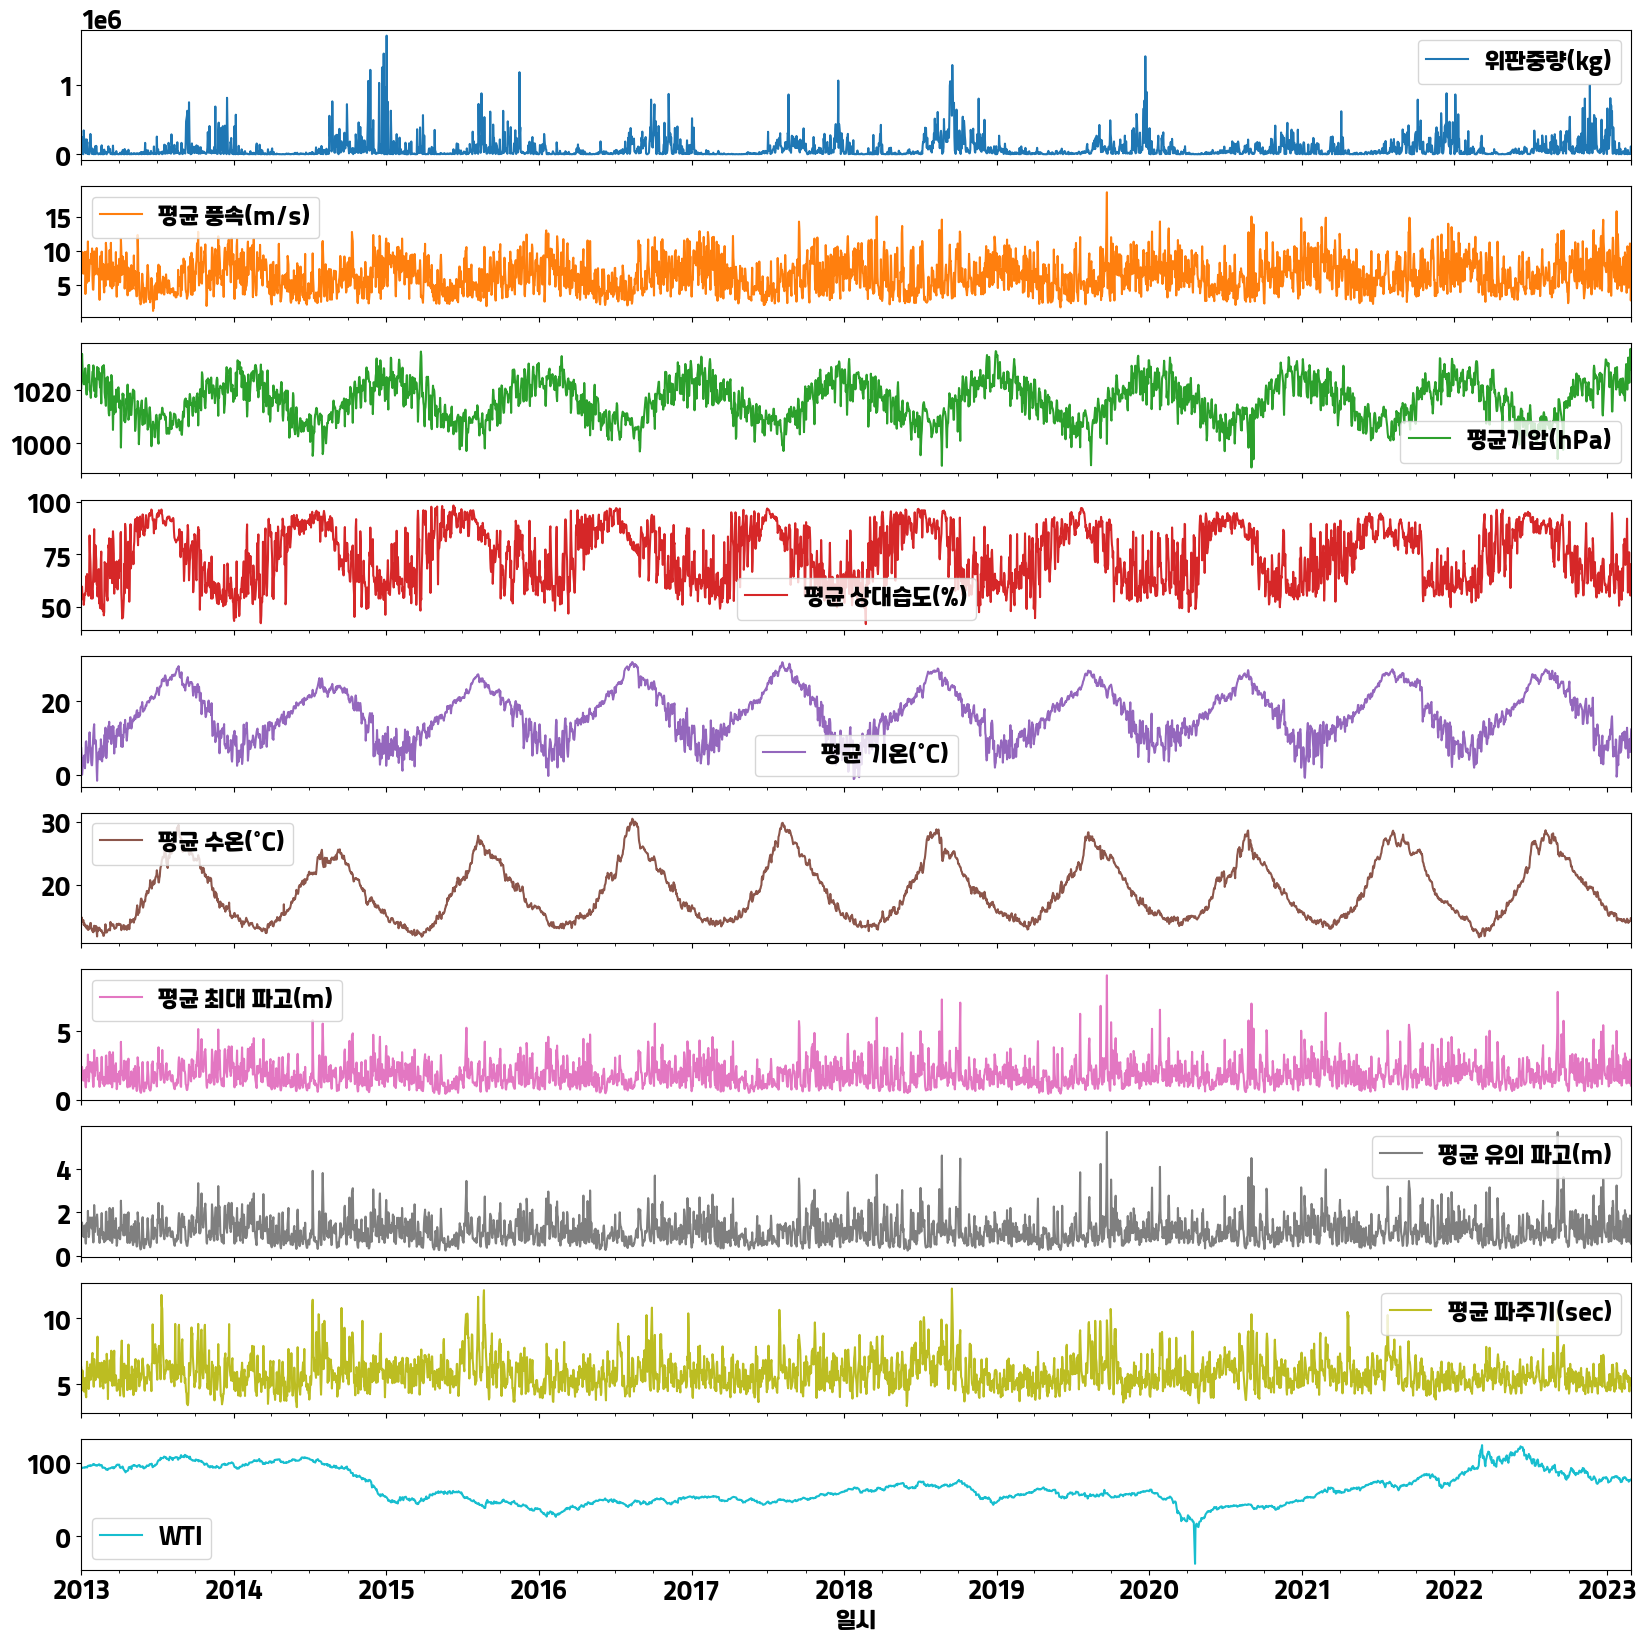

In [211]:
plt.rcParams['figure.figsize'] = (20,20)
features_considered = data.columns
features = data[:]
features.plot(subplots=True)

array([<AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>], dtype=object)

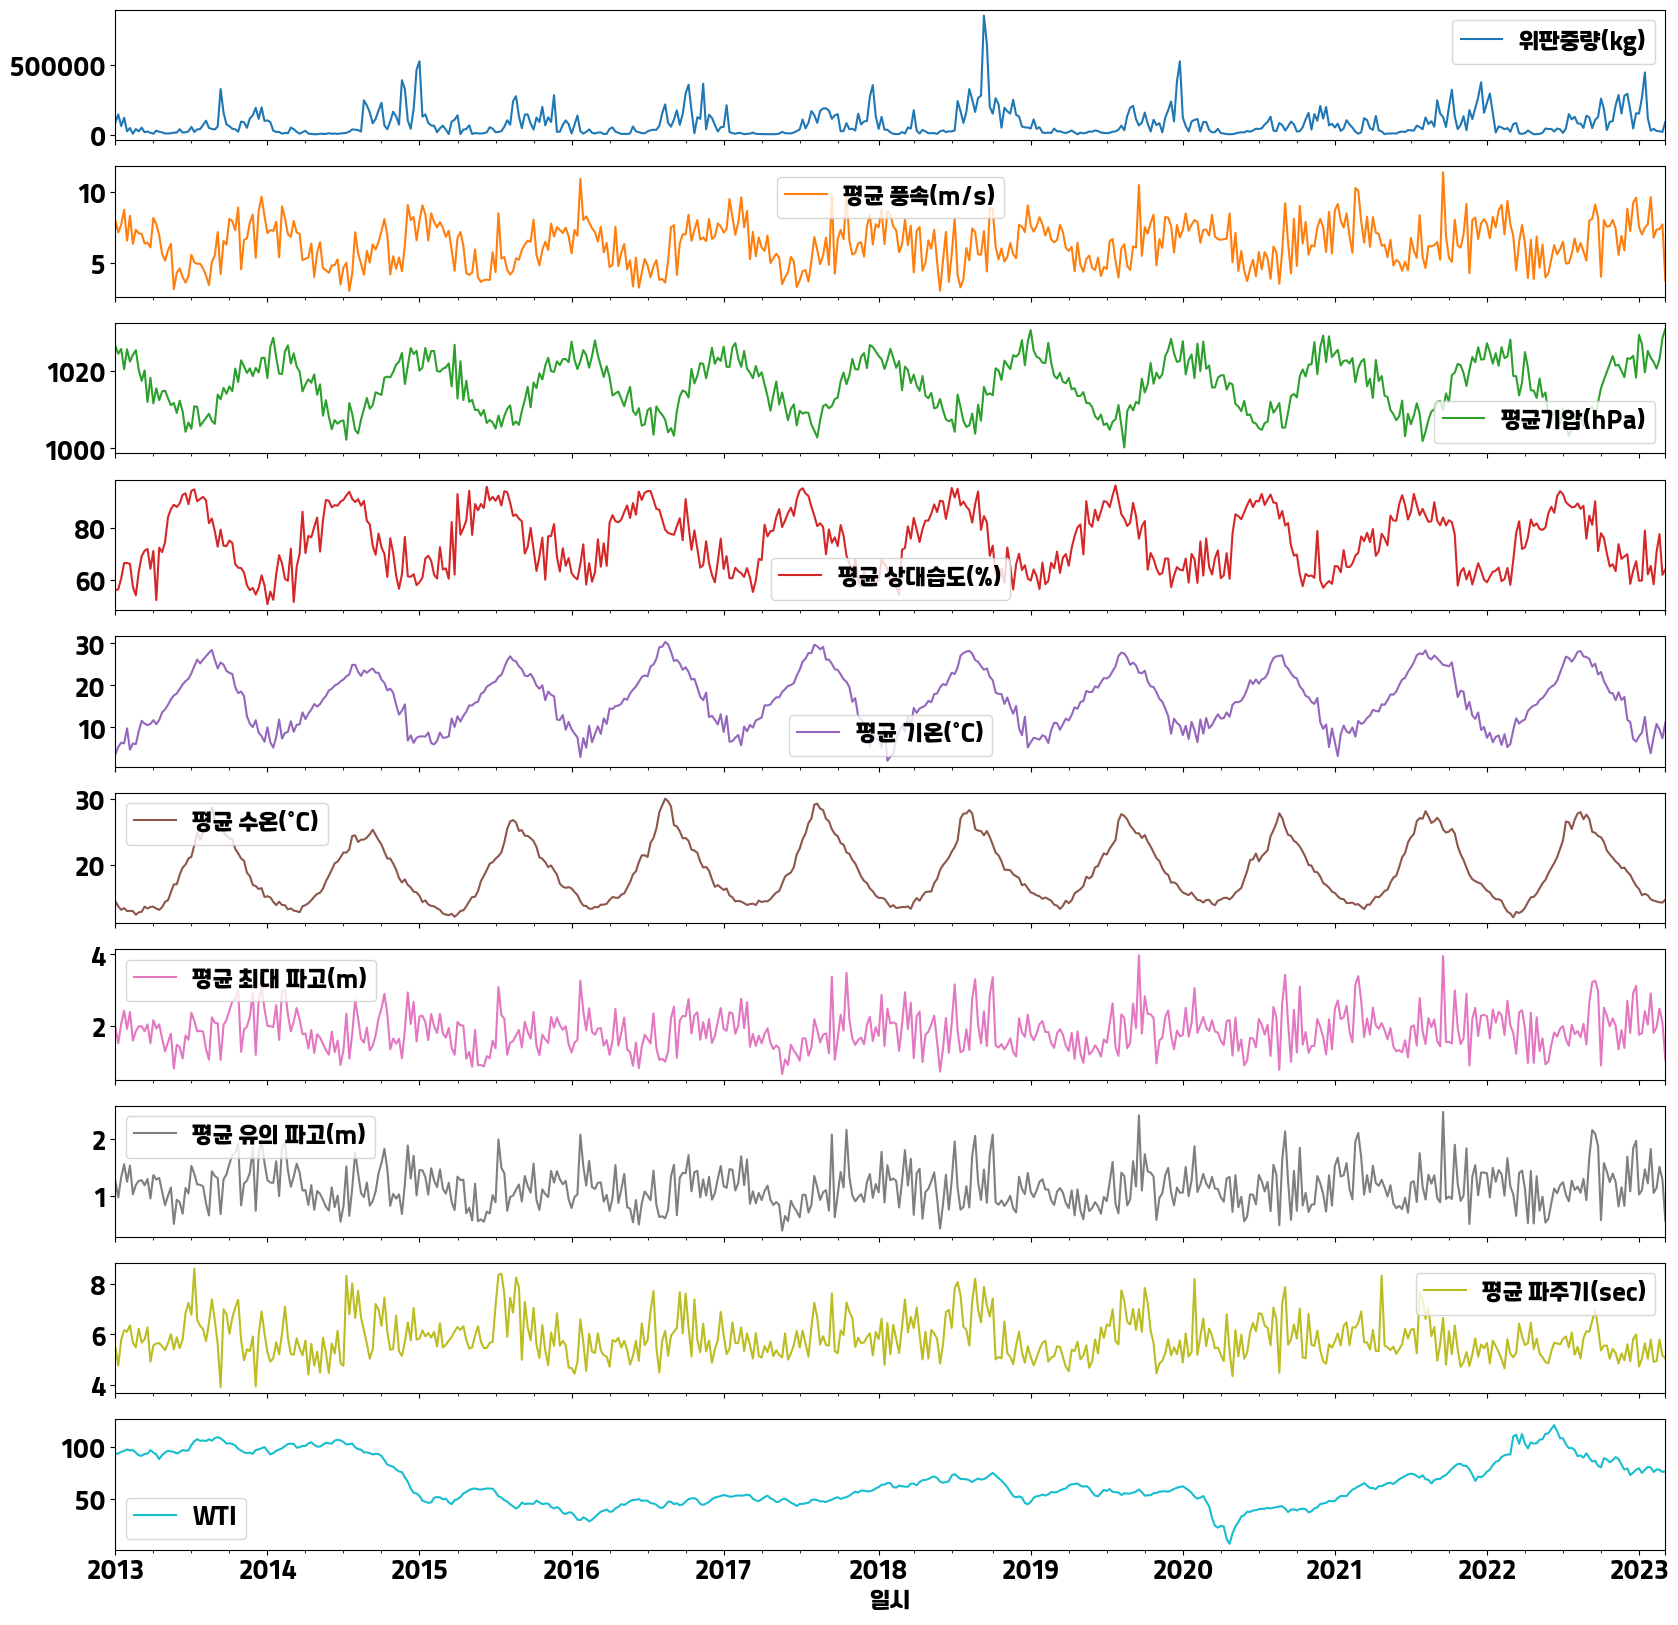

In [212]:
plt.rcParams['figure.figsize'] = (20,20)
features_considered = weekly_mean_data.columns
features = weekly_mean_data[:]
features.plot(subplots=True)

array([<AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>], dtype=object)

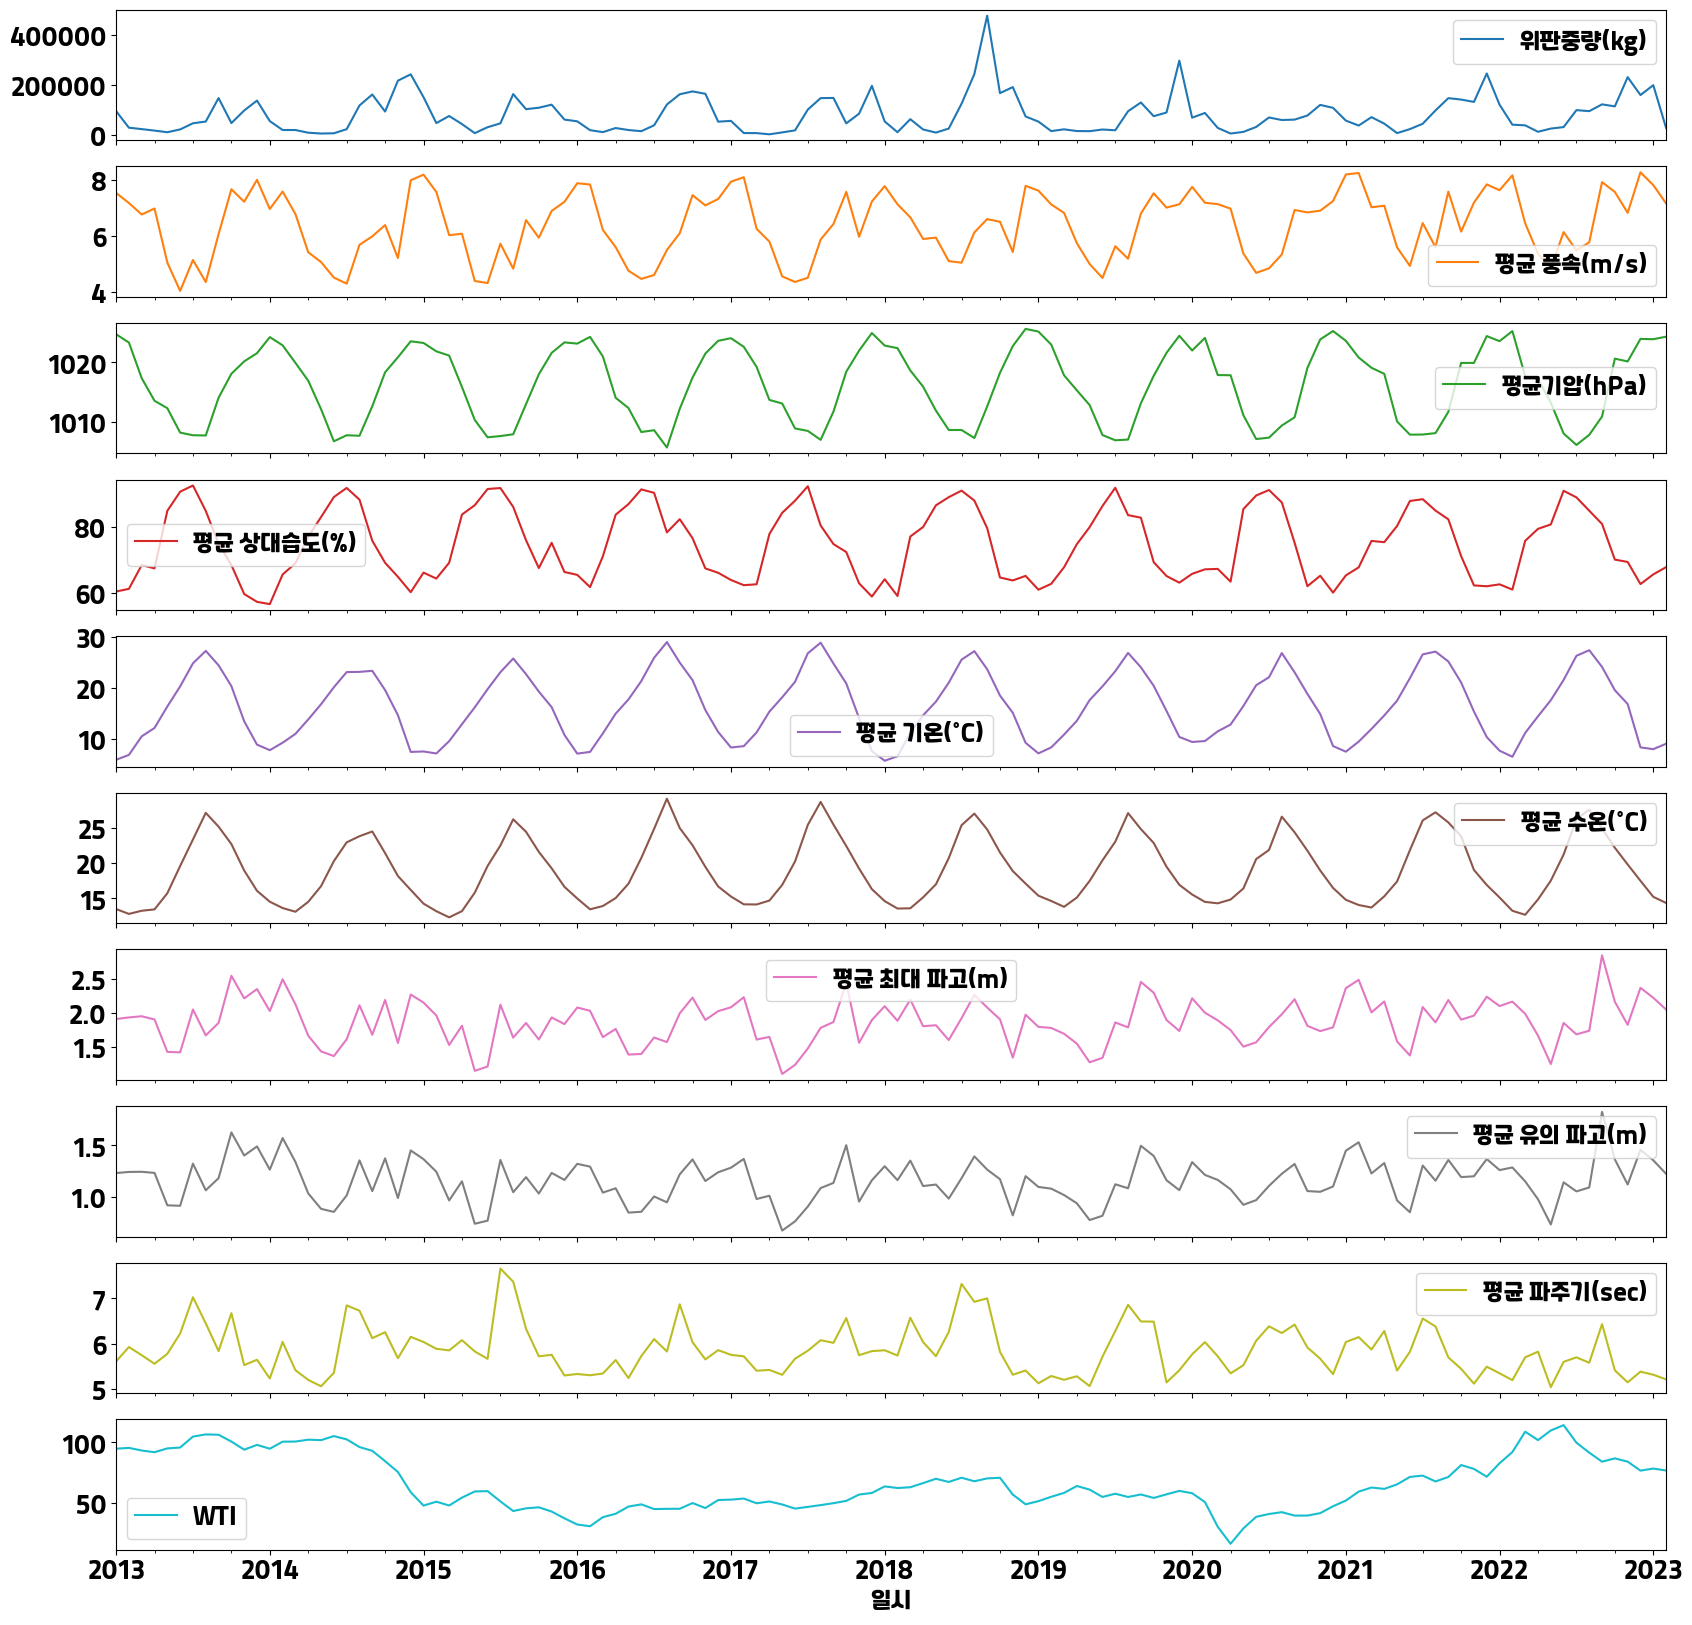

In [213]:
plt.rcParams['figure.figsize'] = (20,20)
features_considered = monthly_mean_data.columns
features = monthly_mean_data[:]
features.plot(subplots=True)

In [214]:
weekly_mean_data_trsf = pd.DataFrame()
for i in weekly_mean_data.columns : 
    print(i+' : ',weekly_mean_data[str(i)].skew())
    if weekly_mean_data[str(i)].skew() > 0 :
        weekly_mean_data_trsf[str(i)] = np.log(weekly_mean_data[str(i)])
    elif weekly_mean_data[str(i)].skew() <0:
        weekly_mean_data_trsf[str(i)] = weekly_mean_data[str(i)].map(lambda x : x **2)
    print(i+' : ',weekly_mean_data_trsf[str(i)].skew())

위판중량(kg) :  2.7878834584090773
위판중량(kg) :  -0.33993292443939
평균 풍속(m/s) :  0.11318099664488597
평균 풍속(m/s) :  -0.42058088000246324
평균기압(hPa) :  -0.09738582727832715
평균기압(hPa) :  -0.08809490431639358
평균 상대습도(%) :  0.04414975677129908
평균 상대습도(%) :  -0.13237923046648348
평균 기온(°C) :  0.052506980400411206
평균 기온(°C) :  -0.7650344988501977
평균 수온(°C) :  0.4519013036359312
평균 수온(°C) :  0.1872135403183612
평균 최대 파고(m) :  0.5994832655102554
평균 최대 파고(m) :  -0.27617924973914526
평균 유의 파고(m) :  0.5971300363305211
평균 유의 파고(m) :  -0.29345814039062235
평균 파주기(sec) :  0.8447782464332363
평균 파주기(sec) :  0.4560578483998993
WTI :  0.4025483064828934
WTI :  -0.697661390764601


In [215]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [216]:
def detect_outliers(df,columns,alter_df):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1
    
    boundary=1.5*iqr

    lower, upper = q1-boundary,q3+boundary    

    mask1 = df[columns] > upper
    mask2 = df[columns] < lower

    if mask1.any():
        # 최대치
        df.loc[mask1, columns] = upper
        alter_df[columns] = df[columns]
    elif mask2.any():
        # 최소치
        df.loc[mask2, columns] = lower
        alter_df[columns] = df[columns]
    else:
        alter_df[columns] = df[columns]
    
    return alter_df

In [217]:
## UDF for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [218]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [219]:
for i in weekly_mean_data.columns :
    print(i)
    print(adf_test(weekly_mean_data[str(i)]))
    print('=========================================================')

위판중량(kg)
Results of Dickey-Fuller Test:
Test Statistic                -6.217294e+00
p-value                        5.327443e-08
#Lags Used                     1.900000e+01
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64
None
평균 풍속(m/s)
Results of Dickey-Fuller Test:
Test Statistic                -7.492294e+00
p-value                        4.472505e-11
#Lags Used                     1.600000e+01
Number of Observations Used    5.140000e+02
Critical Value (1%)           -3.443136e+00
Critical Value (5%)           -2.867179e+00
Critical Value (10%)          -2.569774e+00
dtype: float64
None
평균기압(hPa)
Results of Dickey-Fuller Test:
Test Statistic                -9.878827e+00
p-value                        3.818102e-17
#Lags Used                     1.900000e+01
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
C

In [220]:
for i in weekly_mean_data.columns :
    print(i)
    print(kpss_test(weekly_mean_data[str(i)]))
    print('=========================================================')

위판중량(kg)
KPSS Statistic: 0.11534095570030724
p-value: 0.1
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 풍속(m/s)
KPSS Statistic: 0.20118506652659338
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균기압(hPa)
KPSS Statistic: 0.021763034770242832
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 상대습도(%)
KPSS Statistic: 0.018482911640310927
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 기온(°C)
KPSS Statistic: 0.026485369656155826
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 수온(°C)
KPSS Statistic: 0.058994019479153094
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 최대 파고(m)
KPSS Statistic: 0.22212443669833626
p-value: 0.1
num lags: 10
Critial V

c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is g

In [221]:
for i in weekly_mean_data.columns :
    print(i)
    print(kpss_test(weekly_mean_data[str(i)]))
    print('=========================================================')

위판중량(kg)
KPSS Statistic: 0.11534095570030724
p-value: 0.1
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 풍속(m/s)
KPSS Statistic: 0.20118506652659338
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균기압(hPa)
KPSS Statistic: 0.021763034770242832
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 상대습도(%)
KPSS Statistic: 0.018482911640310927
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 기온(°C)
KPSS Statistic: 0.026485369656155826
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 수온(°C)
KPSS Statistic: 0.058994019479153094
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
평균 최대 파고(m)
KPSS Statistic: 0.22212443669833626
p-value: 0.1
num lags: 10
Critial V

c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is g

wti 데이터만 비정상 시계열 데이터로 볼 수 있다

sarimax에서는 standard
lstm에서는 minmax or robust or standard


In [222]:
weekly_mean_data.head()

위판중량(kg)  평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  \
일시                                                                          
2013-01-06   85405.333333    7.988889  1026.611111   56.055556   3.572222   
2013-01-13  144577.714286    7.142857  1024.519048   56.428571   5.314286   
2013-01-20   60693.428571    7.678571  1025.780952   60.619048   6.323810   
2013-01-27  120511.857143    8.742857  1020.526191   66.523810   6.161905   
2013-02-03   23164.142857    6.566667  1025.695238   66.523810   9.733333   

            평균 수온(°C)  평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)        WTI  
일시                                                                       
2013-01-06  14.400000     1.961111     1.261111     5.511111  92.871667  
2013-01-13  13.600000     1.519048     0.976190     4.766667  93.502857  
2013-01-20  13.095238     2.064286     1.326190     5.780952  94.905714  
2013-01-27  13.361905     2.423810     1.552381     6.166667  95.955714  
2013-02-03  12.895238     1.919048     1.247619     6.104762  97.307143

In [223]:
print('정규성 검정(pvalue>0.05에서 정규성 가정 break)')
for i in weekly_mean_data_mm.columns:
    print(i+' : ', stats.shapiro(weekly_mean_data_mm[str(i)]))

정규성 검정(pvalue>0.05에서 정규성 가정 break)
위판중량(kg) :  ShapiroResult(statistic=0.7330942153930664, pvalue=2.6344136078267047e-28)
평균 풍속(m/s) :  ShapiroResult(statistic=0.9899946451187134, pvalue=0.0011215340346097946)
평균기압(hPa) :  ShapiroResult(statistic=0.969291090965271, pvalue=4.2300203340062126e-09)
평균 상대습도(%) :  ShapiroResult(statistic=0.9495620727539062, pvalue=1.7626322493594082e-12)
평균 기온(°C) :  ShapiroResult(statistic=0.9661064743995667, pvalue=1.0058612831542746e-09)
평균 수온(°C) :  ShapiroResult(statistic=0.9305086731910706, pvalue=5.487205216706025e-15)
평균 최대 파고(m) :  ShapiroResult(statistic=0.978590190410614, pvalue=5.051704192737816e-07)
평균 유의 파고(m) :  ShapiroResult(statistic=0.9781078100204468, pvalue=3.840308124836156e-07)
평균 파주기(sec) :  ShapiroResult(statistic=0.9540039896965027, pvalue=8.320946362494475e-12)
WTI :  ShapiroResult(statistic=0.9481365084648132, pvalue=1.09207423919927e-12)


In [224]:
print('정규성 검정(pvalue<0.05에서 정규성 가정 break)')
for i in weekly_mean_data_mm.columns:
    print(i+' : ', stats.shapiro(weekly_mean_data_mm[str(i)]))

정규성 검정(pvalue<0.05에서 정규성 가정 break)
위판중량(kg) :  ShapiroResult(statistic=0.7330942153930664, pvalue=2.6344136078267047e-28)
평균 풍속(m/s) :  ShapiroResult(statistic=0.9899946451187134, pvalue=0.0011215340346097946)
평균기압(hPa) :  ShapiroResult(statistic=0.969291090965271, pvalue=4.2300203340062126e-09)
평균 상대습도(%) :  ShapiroResult(statistic=0.9495620727539062, pvalue=1.7626322493594082e-12)
평균 기온(°C) :  ShapiroResult(statistic=0.9661064743995667, pvalue=1.0058612831542746e-09)
평균 수온(°C) :  ShapiroResult(statistic=0.9305086731910706, pvalue=5.487205216706025e-15)
평균 최대 파고(m) :  ShapiroResult(statistic=0.978590190410614, pvalue=5.051704192737816e-07)
평균 유의 파고(m) :  ShapiroResult(statistic=0.9781078100204468, pvalue=3.840308124836156e-07)
평균 파주기(sec) :  ShapiroResult(statistic=0.9540039896965027, pvalue=8.320946362494475e-12)
WTI :  ShapiroResult(statistic=0.9481365084648132, pvalue=1.09207423919927e-12)


In [225]:
print('pvalue < 0.05에서 유의')
for i in weekly_mean_data.columns[1:] : 
    print(i+' : ', stats.pearsonr(x=weekly_mean_data['위판중량(kg)'], y= weekly_mean_data[str(i)]))


pvalue < 0.05에서 유의
평균 풍속(m/s) :  PearsonRResult(statistic=0.06388025030571212, pvalue=0.1415473181322551)
평균기압(hPa) :  PearsonRResult(statistic=0.13188990293251102, pvalue=0.002324113311995272)
평균 상대습도(%) :  PearsonRResult(statistic=-0.11914462731015088, pvalue=0.005980855371784912)
평균 기온(°C) :  PearsonRResult(statistic=0.1210196255340748, pvalue=0.00523176454679018)
평균 수온(°C) :  PearsonRResult(statistic=0.2735527878615588, pvalue=1.4415845003805573e-10)
평균 최대 파고(m) :  PearsonRResult(statistic=0.03777996554541715, pvalue=0.3849352747000186)
평균 유의 파고(m) :  PearsonRResult(statistic=0.03519076714452827, pvalue=0.41836796684185007)
평균 파주기(sec) :  PearsonRResult(statistic=0.06775966934050985, pvalue=0.11887126613083245)
WTI :  PearsonRResult(statistic=-0.010212475252412683, pvalue=0.8143778812144007)


In [226]:
# weekly_mean_data = weekly_mean_data.drop(['평균 풍속(m/s)','평균 유의 파고(m)','평균 파주기(sec)','평균 유의 파고(m)','WTI'], axis=1)

In [227]:
weekly_mean_data.corr(method='pearson')

위판중량(kg)  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  \
위판중량(kg)     1.000000    0.063880   0.131890   -0.119145   0.121020   
평균 풍속(m/s)   0.063880    1.000000   0.500776   -0.566792  -0.502946   
평균기압(hPa)    0.131890    0.500776   1.000000   -0.844133  -0.811133   
평균 상대습도(%)  -0.119145   -0.566792  -0.844133    1.000000   0.736939   
평균 기온(°C)    0.121020   -0.502946  -0.811133    0.736939   1.000000   
평균 수온(°C)    0.273553   -0.300417  -0.636161    0.514075   0.913948   
평균 최대 파고(m)  0.037780    0.833185   0.135274   -0.191447  -0.162326   
평균 유의 파고(m)  0.035191    0.823407   0.123216   -0.182096  -0.155129   
평균 파주기(sec)  0.067760    0.120060  -0.347755    0.317012   0.332472   
WTI         -0.010212   -0.053079  -0.084530    0.064463   0.048795   

             평균 수온(°C)  평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)       WTI  
위판중량(kg)      0.273553     0.037780     0.035191     0.067760 -0.010212  
평균 풍속(m/s)   -0.300417     0.833185     0.823407     0.120060 -0.053079  
평균기압(hPa)    -0.636161     0.135274     0.123216    -0.347755 -0.084530  
평균 상대습도(%)    0.514075    -0.191447    -0.182096     0.317012  0.064463  
평균 기온(°C)     0.913948    -0.162326    -0.155129     0.332472  0.048795  
평균 수온(°C)     1.000000    -0.025043    -0.019176     0.349396  0.021552  
평균 최대 파고(m)  -0.025043     1.000000     0.996303     0.521111  0.066003  
평균 유의 파고(m)  -0.019176     0.996303     1.000000     0.531506  0.080792  
평균 파주기(sec)   0.349396     0.521111     0.531506     1.000000 -0.018180  
WTI           0.021552     0.066003     0.080792    -0.018180  1.000000

([<matplotlib.axis.XTick at 0x214684ac5b0>,
 [Text(1, 0, '위판중량(kg)'),
  Text(2, 0, '평균 기온(°C)'),
  Text(3, 0, '평균 상대습도(%)'),
  Text(4, 0, '평균 수온(°C)'),
  Text(5, 0, '평균 최대 파고(m)'),
  Text(6, 0, '평균기압(hPa)'),
  Text(7, 0, 'WTI')])

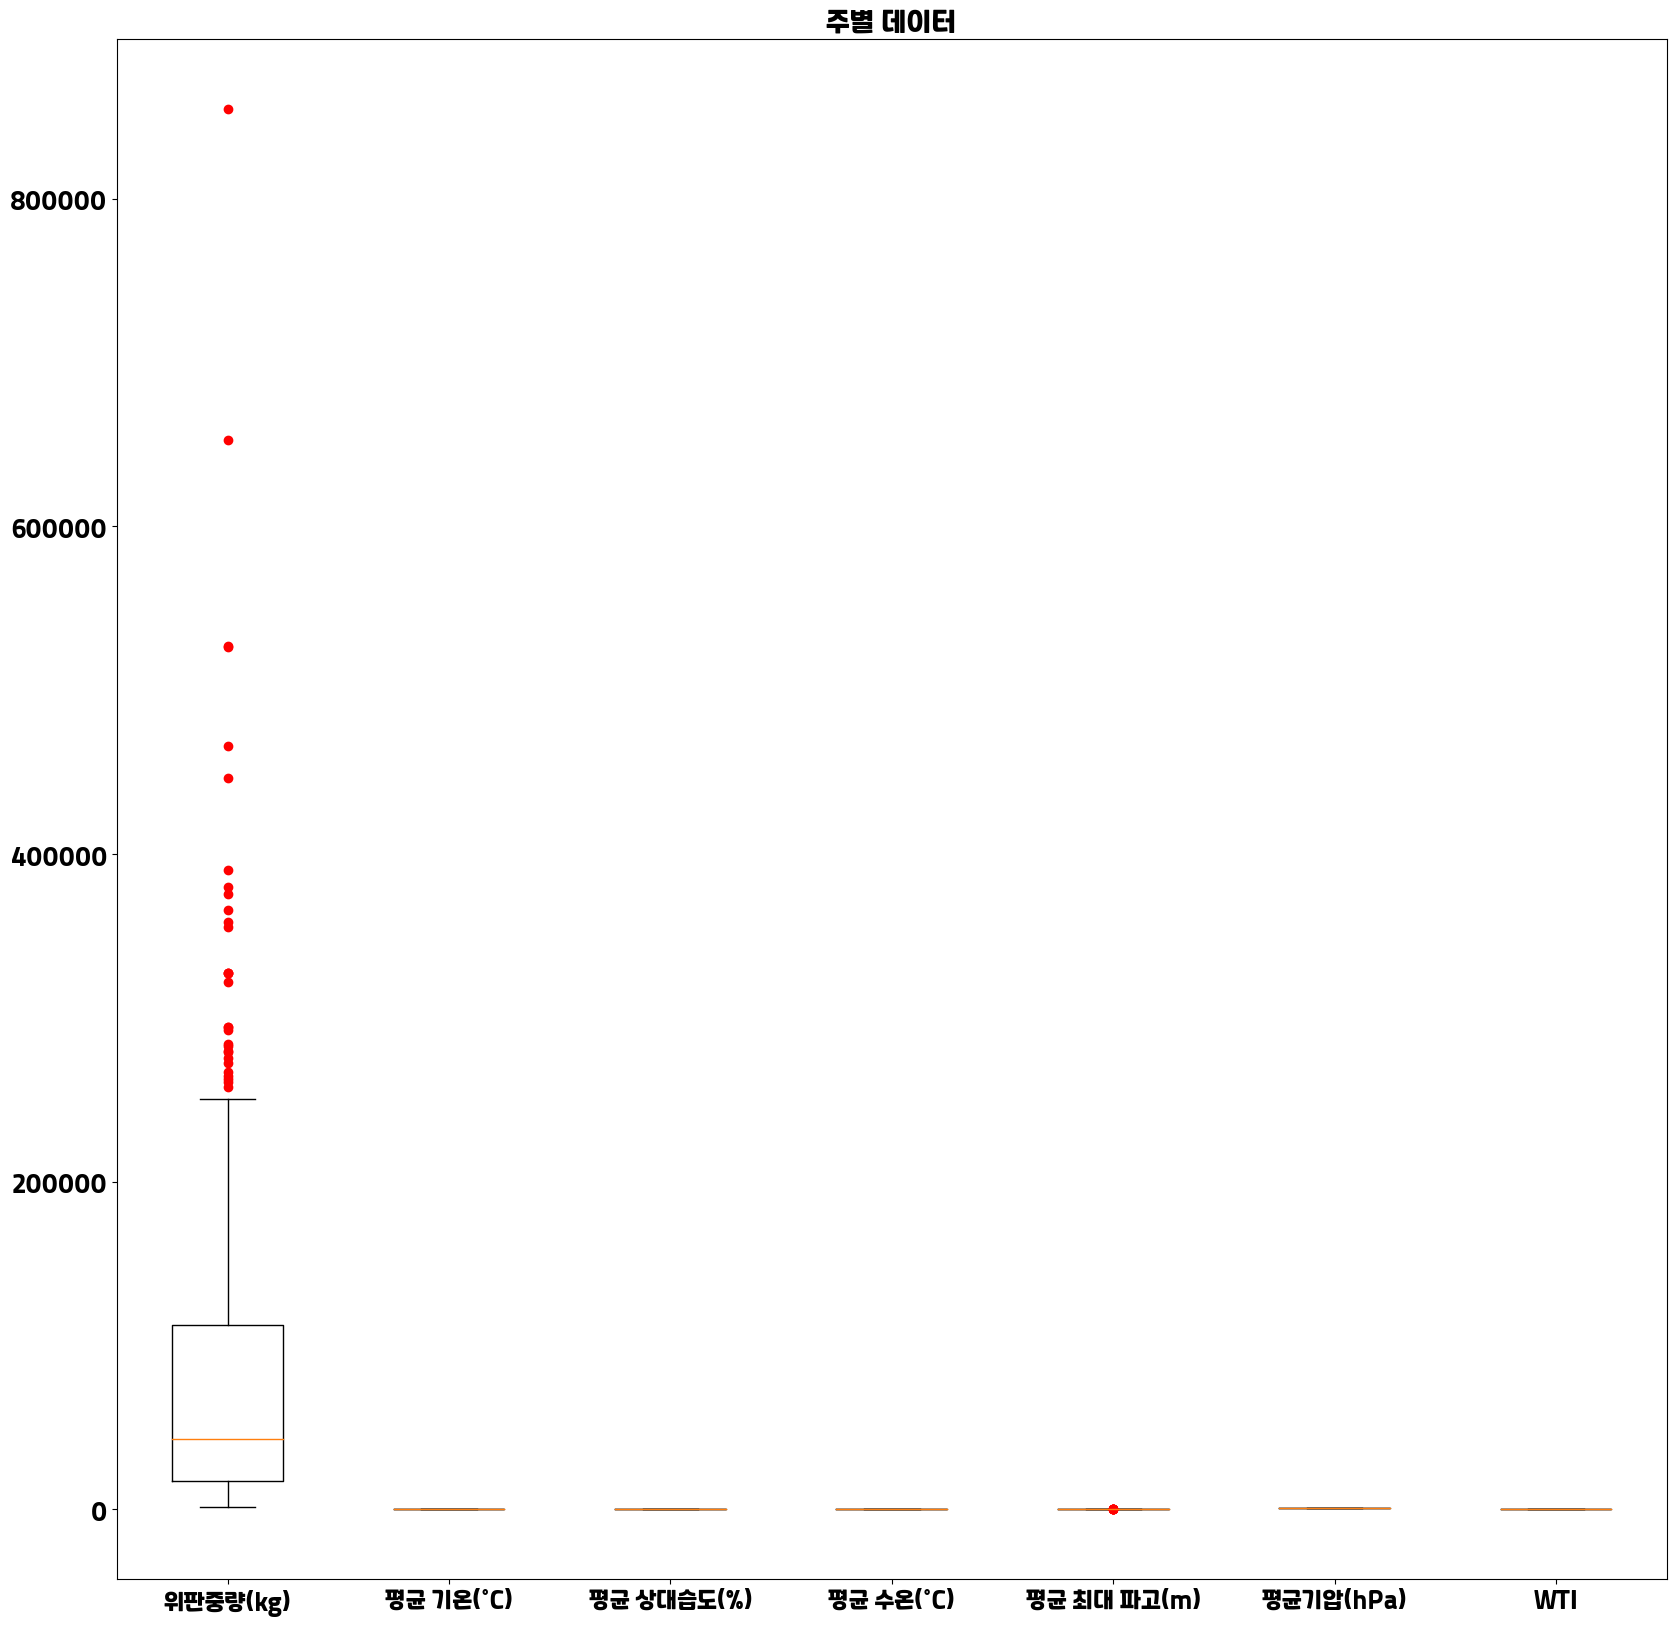

In [228]:
fig, ax = plt.subplots()
ax.boxplot([weekly_mean_data['위판중량(kg)'],weekly_mean_data['평균 기온(°C)'],weekly_mean_data['평균 상대습도(%)'],weekly_mean_data['평균 수온(°C)'], weekly_mean_data['평균 최대 파고(m)'],weekly_mean_data['평균기압(hPa)'],weekly_mean_data['WTI']],sym='r')
plt.title('주별 데이터')
plt.xticks([1,2,3,4,5,6,7], ['위판중량(kg)','평균 기온(°C)','평균 상대습도(%)','평균 수온(°C)','평균 최대 파고(m)','평균기압(hPa)','WTI'])

([<matplotlib.axis.XTick at 0x21463c57310>,
 [Text(1, 0, '위판중량(kg)'),
  Text(2, 0, '평균 기온(°C)'),
  Text(3, 0, '평균 상대습도(%)'),
  Text(4, 0, '평균 수온(°C)'),
  Text(5, 0, '평균 최대 파고(m)'),
  Text(6, 0, '평균기압(hPa)'),
  Text(7, 0, 'WTI')])

c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


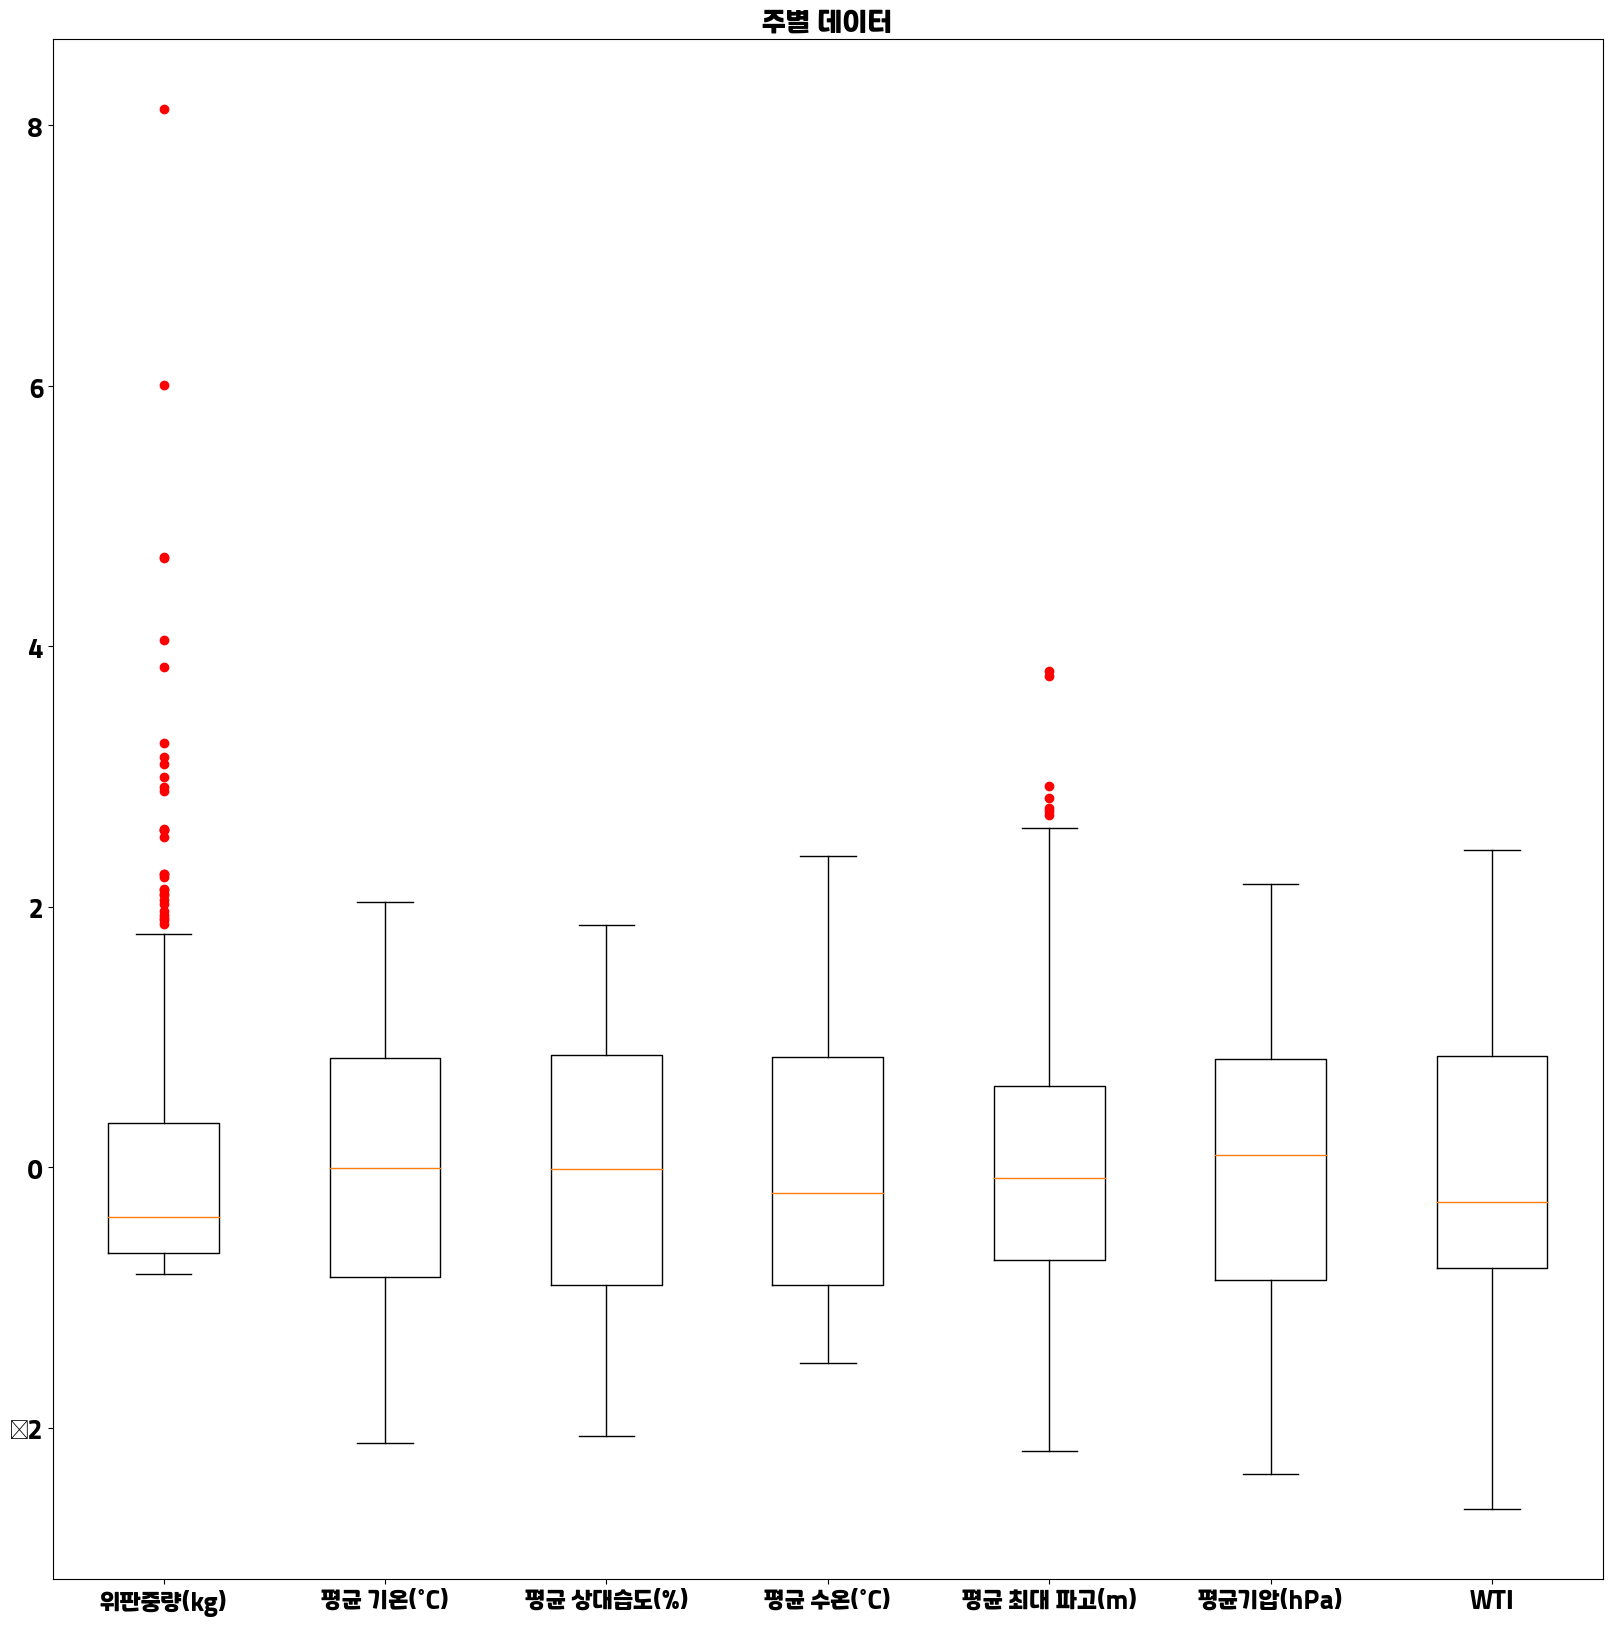

In [229]:
#standard scale한 데이터
fig, ax = plt.subplots()
ax.boxplot([weekly_mean_data_stan['위판중량(kg)'],weekly_mean_data_stan['평균 기온(°C)'],weekly_mean_data_stan['평균 상대습도(%)'],weekly_mean_data_stan['평균 수온(°C)'], weekly_mean_data_stan['평균 최대 파고(m)'],weekly_mean_data_stan['평균기압(hPa)'],weekly_mean_data_stan['WTI']],sym='r')
plt.title('주별 데이터')
plt.xticks([1,2,3,4,5,6,7], ['위판중량(kg)','평균 기온(°C)','평균 상대습도(%)','평균 수온(°C)','평균 최대 파고(m)','평균기압(hPa)','WTI'])

571개 자료 중 30개 자료에 이상치 발견 ==> 처리 어떻게?
### week_~ data = raw 주별 데이터
### week_~ stan = raw 주별 데이터(standard scale)
### week_~ mm = raw 주별 데이터(minmax scale)

~strf = > 이상치 처리 시도 하였으나 오히러 더 튀는 자료가 되어서 취소



In [231]:
def detect_outliers(df, columns, alter_df):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    
    boundary = 1.5 * iqr

    index1 = df[df[columns] > q3 + boundary].index
    index2 = df[df[columns] < q1 - boundary].index 
    lower, upper = q1 - boundary, q3 + boundary
    
    # element-wise comparison
    mask1 = df[columns] > upper
    mask2 = df[columns] < lower
    print(mask1)
    
    if mask1.any():
        # 최대치
        df.loc[mask1, columns] = upper
        alter_df[columns] = df[columns]
    elif mask2.any():
        # 최소치
        df.loc[mask2, columns] = lower
        alter_df[columns] = df[columns]
    else:
        alter_df[columns] = df[columns]
    
    return alter_df


alter_outliers = pd.DataFrame()
for i in weekly_mean_data.columns:
    alter_outliers = detect_outliers(weekly_mean_data, i, alter_outliers)
alter_outliers

일시
2013-01-06    False
2013-01-13    False
2013-01-20    False
2013-01-27    False
2013-02-03    False
              ...  
2023-02-05    False
2023-02-12    False
2023-02-19    False
2023-02-26    False
2023-03-05    False
Freq: W-SUN, Name: 위판중량(kg), Length: 531, dtype: bool
일시
2013-01-06    False
2013-01-13    False
2013-01-20    False
2013-01-27    False
2013-02-03    False
              ...  
2023-02-05    False
2023-02-12    False
2023-02-19    False
2023-02-26    False
2023-03-05    False
Freq: W-SUN, Name: 평균 풍속(m/s), Length: 531, dtype: bool
일시
2013-01-06    False
2013-01-13    False
2013-01-20    False
2013-01-27    False
2013-02-03    False
              ...  
2023-02-05    False
2023-02-12    False
2023-02-19    False
2023-02-26    False
2023-03-05    False
Freq: W-SUN, Name: 평균기압(hPa), Length: 531, dtype: bool
일시
2013-01-06    False
2013-01-13    False
2013-01-20    False
2013-01-27    False
2013-02-03    False
              ...  
2023-02-05    False
2023-02-12    False
202

위판중량(kg)  평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  \
일시                                                                          
2013-01-06   85405.333333    7.988889  1026.611111   56.055556   3.572222   
2013-01-13  144577.714286    7.142857  1024.519048   56.428571   5.314286   
2013-01-20   60693.428571    7.678571  1025.780952   60.619048   6.323810   
2013-01-27  120511.857143    8.742857  1020.526191   66.523810   6.161905   
2013-02-03   23164.142857    6.566667  1025.695238   66.523810   9.733333   
...                   ...         ...          ...         ...        ...   
2023-02-05   40680.428571    6.773469  1022.373469   58.346939   7.751020   
2023-02-12   25676.642857    7.354082  1020.671088   70.792517  10.791497   
2023-02-19   23502.428571    7.367602  1023.093622   77.612245   9.461735   
2023-02-26   18358.571429    7.720408  1028.565306   62.000000   7.381633   
2023-03-05   90182.500000    3.764286  1030.985715   64.071429  11.114286   

            평균 수온(°C)  평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)        WTI  
일시                                                                       
2013-01-06  14.400000     1.961111     1.261111     5.511111  92.871667  
2013-01-13  13.600000     1.519048     0.976190     4.766667  93.502857  
2013-01-20  13.095238     2.064286     1.326190     5.780952  94.905714  
2013-01-27  13.361905     2.423810     1.552381     6.166667  95.955714  
2013-02-03  12.895238     1.919048     1.247619     6.104762  97.307143  
...               ...          ...          ...          ...        ...  
2023-02-05  14.502041     1.806122     1.053061     4.906122  75.707143  
2023-02-12  14.368367     1.964626     1.141837     4.929252  78.194286  
2023-02-19  14.246939     2.484439     1.506888     5.785714  77.880714  
2023-02-26  14.191837     2.108163     1.285714     5.155102  75.717857  
2023-03-05  14.642857     1.057143     0.571429     5.042857  76.365000  

[531 rows x 10 columns]

([<matplotlib.axis.XTick at 0x214688e5fd0>,
 [Text(1, 0, '위판중량(kg)'),
  Text(2, 0, '평균 기온(°C)'),
  Text(3, 0, '평균 상대습도(%)'),
  Text(4, 0, '평균 수온(°C)'),
  Text(5, 0, '평균 최대 파고(m)'),
  Text(6, 0, '평균기압(hPa)'),
  Text(7, 0, 'WTI')])

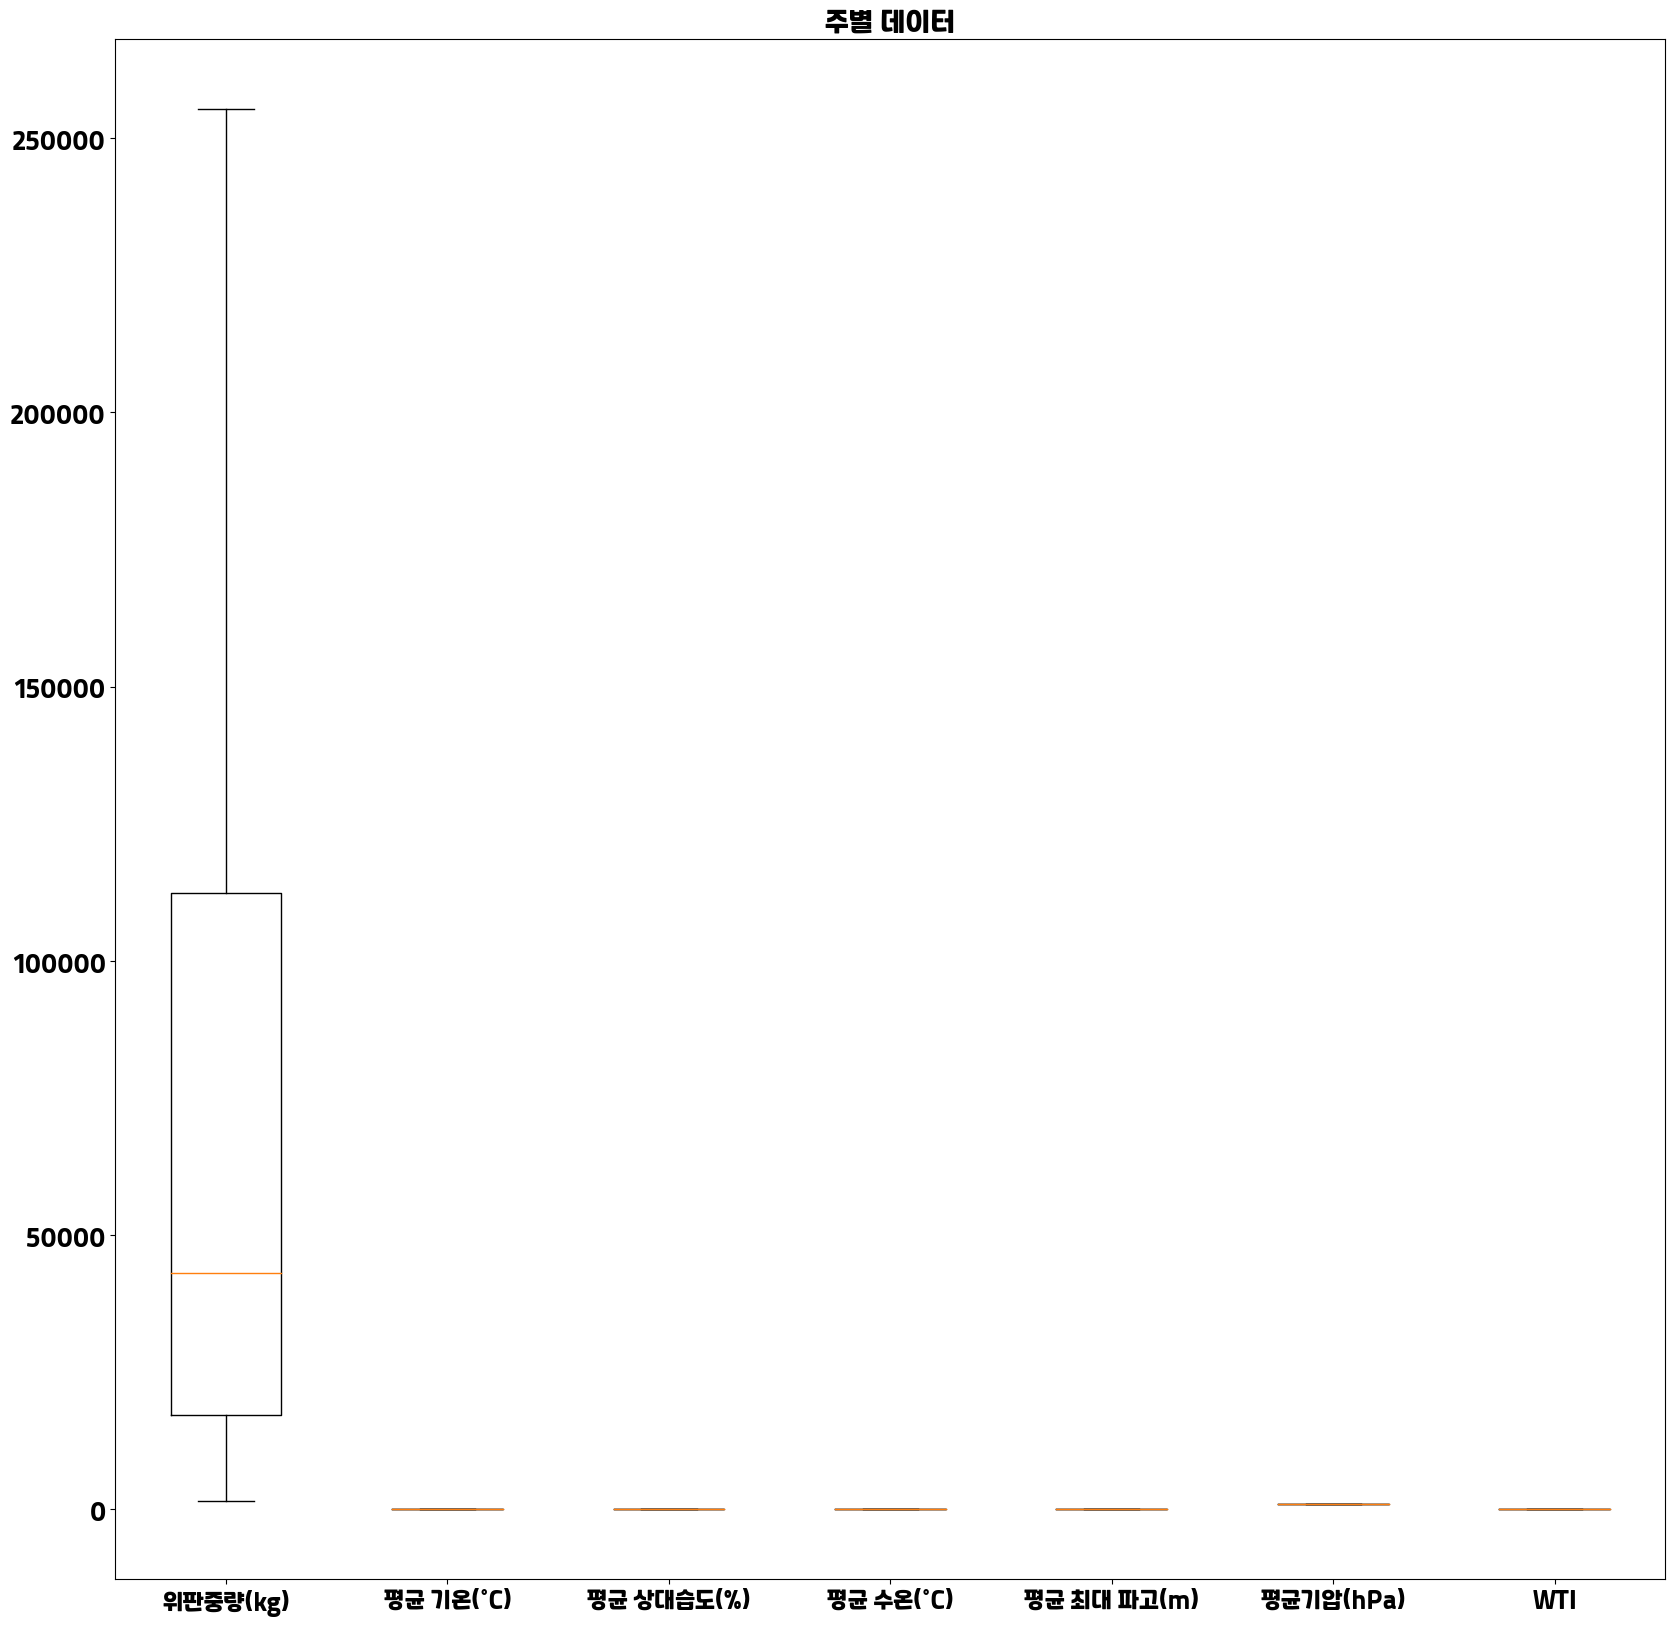

In [232]:
fig, ax = plt.subplots()
ax.boxplot([alter_outliers['위판중량(kg)'],alter_outliers['평균 기온(°C)'],alter_outliers['평균 상대습도(%)'],alter_outliers['평균 수온(°C)'], alter_outliers['평균 최대 파고(m)'],alter_outliers['평균기압(hPa)'],alter_outliers['WTI']],sym='r')
plt.title('주별 데이터')
plt.xticks([1,2,3,4,5,6,7], ['위판중량(kg)','평균 기온(°C)','평균 상대습도(%)','평균 수온(°C)','평균 최대 파고(m)','평균기압(hPa)','WTI'])

array([<AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>], dtype=object)

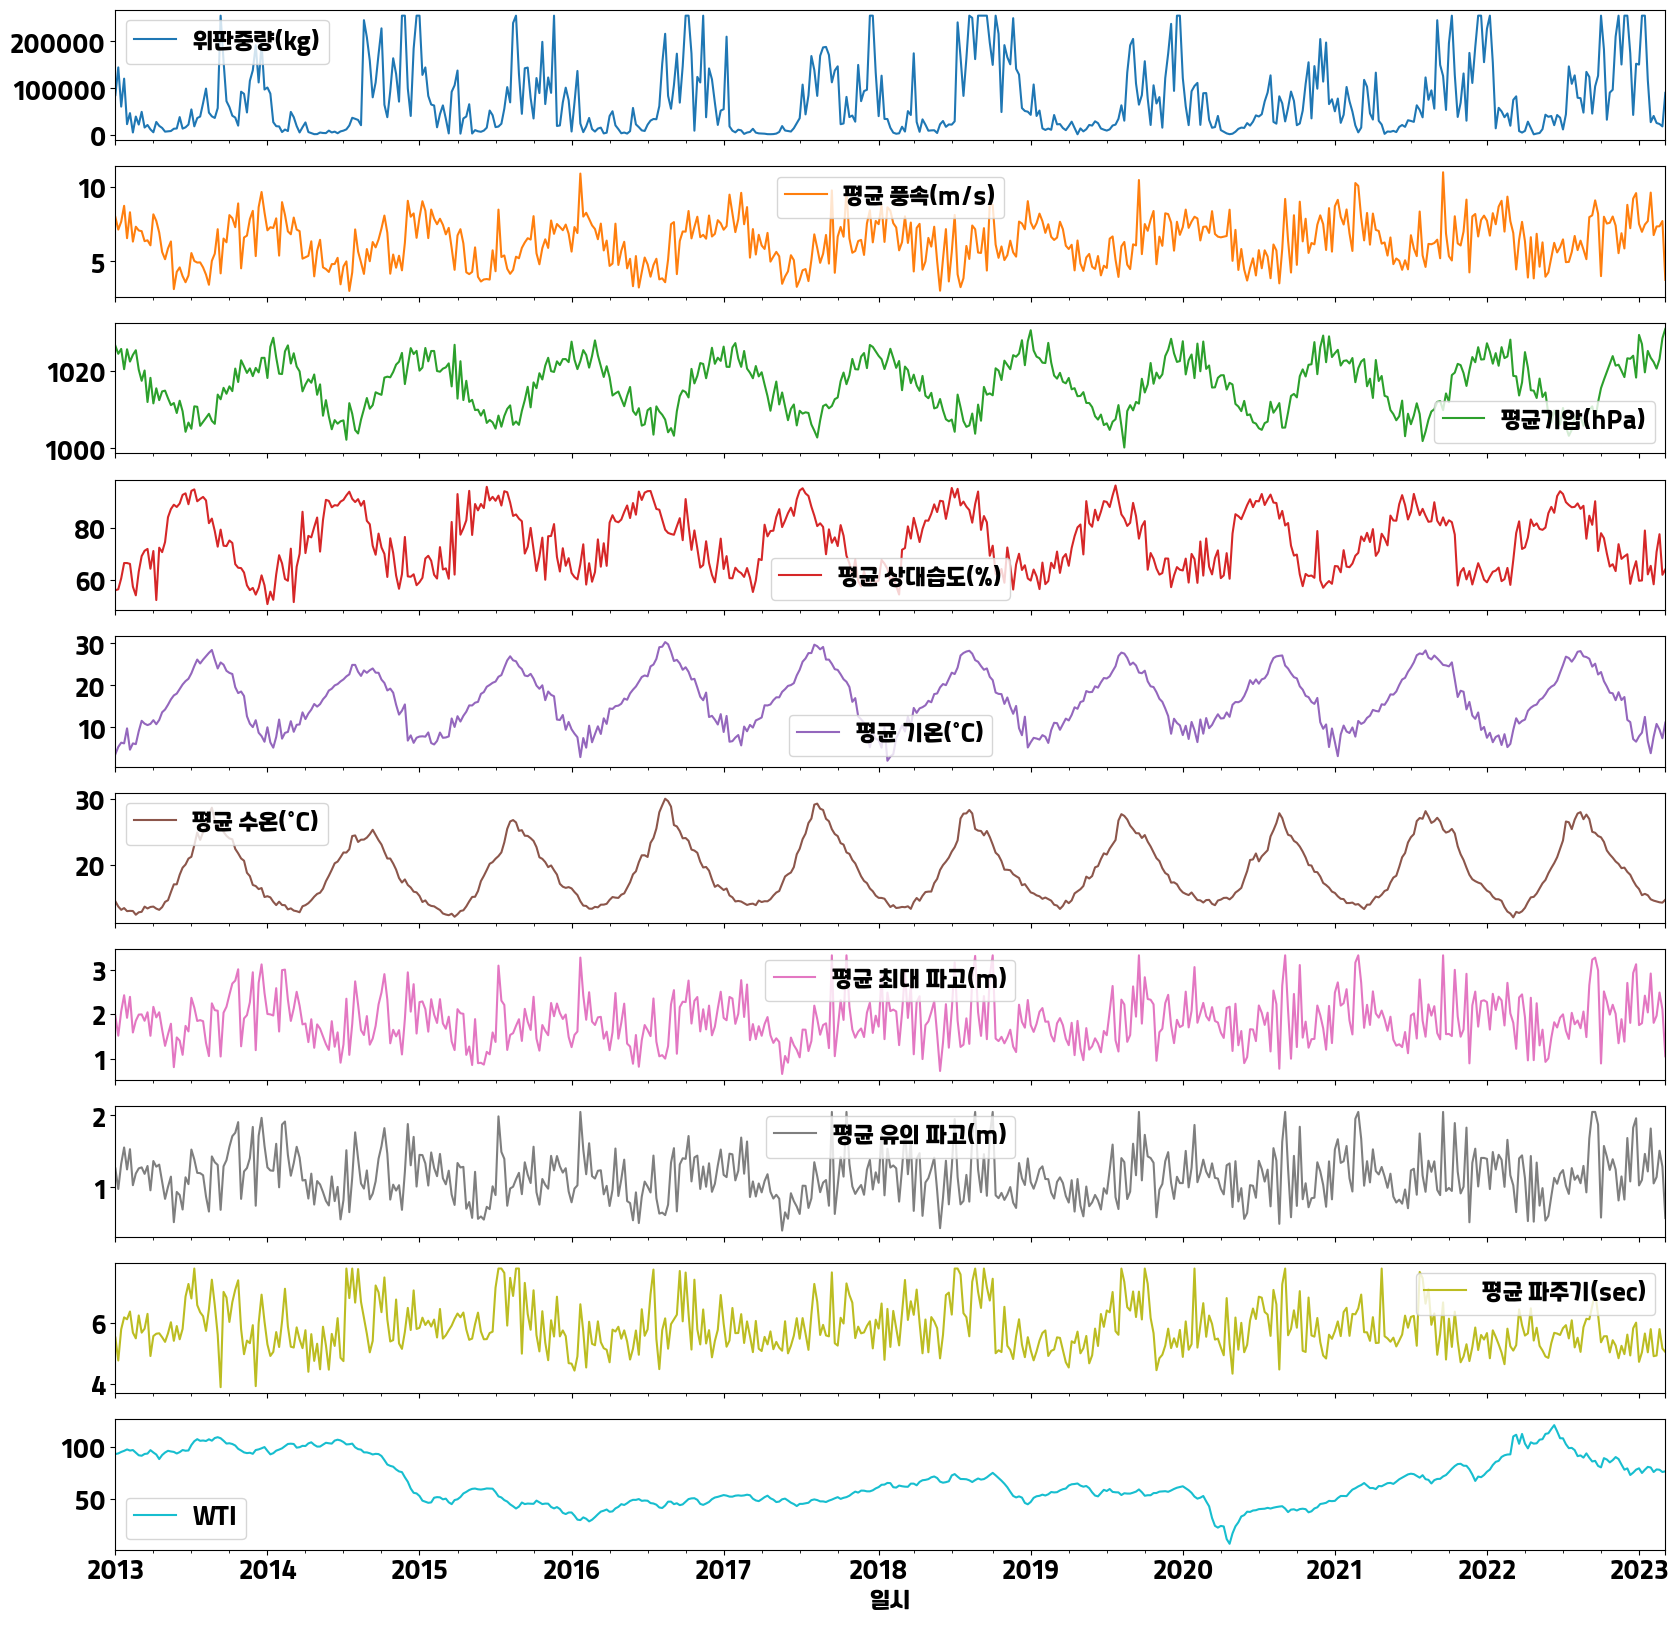

In [233]:
plt.rcParams['figure.figsize'] = (20,20)
features_considered = alter_outliers.columns
features = alter_outliers[:]
features.plot(subplots=True)

In [236]:
# alter_outliers.to_csv('delete ouliter in weeklydata.csv', encoding='utf-8-sig')

print('pvalue < 0.05에서 유의')
for i in alter_outliers.columns[1:] : 
    print(i+' : ', stats.pearsonr(x=alter_outliers['위판중량(kg)'], y= alter_outliers[str(i)]))


pvalue < 0.05에서 유의
평균 풍속(m/s) :  PearsonRResult(statistic=0.07245724344526898, pvalue=0.09533119512165444)
평균기압(hPa) :  PearsonRResult(statistic=0.14014118175732315, pvalue=0.0012049084257114988)
평균 상대습도(%) :  PearsonRResult(statistic=-0.1437759813552219, pvalue=0.000891944678265074)
평균 기온(°C) :  PearsonRResult(statistic=0.15455413366934595, pvalue=0.0003508093506904903)
평균 수온(°C) :  PearsonRResult(statistic=0.33444140072089246, pvalue=2.4205500579658108e-15)
평균 최대 파고(m) :  PearsonRResult(statistic=0.04016852716072938, pvalue=0.35558394941590044)
평균 유의 파고(m) :  PearsonRResult(statistic=0.03765265920645257, pvalue=0.38654002837191653)
평균 파주기(sec) :  PearsonRResult(statistic=0.04750322615226363, pvalue=0.27453656026072043)
WTI :  PearsonRResult(statistic=-0.013013657569950123, pvalue=0.7647986078972618)


In [235]:
print('정규성 검정(pvalue<0.05에서 정규성 가정 break)')
for i in alter_outliers.columns:
    print(i+' : ', stats.shapiro(alter_outliers[str(i)]))

정규성 검정(pvalue<0.05에서 정규성 가정 break)
위판중량(kg) :  ShapiroResult(statistic=0.8361550569534302, pvalue=5.925816466025855e-23)
평균 풍속(m/s) :  ShapiroResult(statistic=0.98985356092453, pvalue=0.0010016041342169046)
평균기압(hPa) :  ShapiroResult(statistic=0.969291090965271, pvalue=4.2300203340062126e-09)
평균 상대습도(%) :  ShapiroResult(statistic=0.9495620131492615, pvalue=1.7626322493594082e-12)
평균 기온(°C) :  ShapiroResult(statistic=0.966106653213501, pvalue=1.0059381105875786e-09)
평균 수온(°C) :  ShapiroResult(statistic=0.9305089712142944, pvalue=5.487677861090593e-15)
평균 최대 파고(m) :  ShapiroResult(statistic=0.9810725450515747, pvalue=2.1890496100240853e-06)
평균 유의 파고(m) :  ShapiroResult(statistic=0.9801232218742371, pvalue=1.2353538068055059e-06)
평균 파주기(sec) :  ShapiroResult(statistic=0.9593570828437805, pvalue=6.1908832227342e-11)
WTI :  ShapiroResult(statistic=0.9481365084648132, pvalue=1.09207423919927e-12)
